## 1. 决策树学习
DecisionTreeClassifier 特征选择参数 <br>
criterion 可以使用"gini"或者"entropy"，前者代表基尼系数，后者代表信息增益。一般说使用默认的基尼系数"gini"就可以了，即CART算法。除非你更喜欢类似ID3, C4.5的最优特征选择方法。<br>
参考：https://www.leiphone.com/news/201707/WYsS1Qebkc80axky.html

[0]
[[1. 0. 0.]]


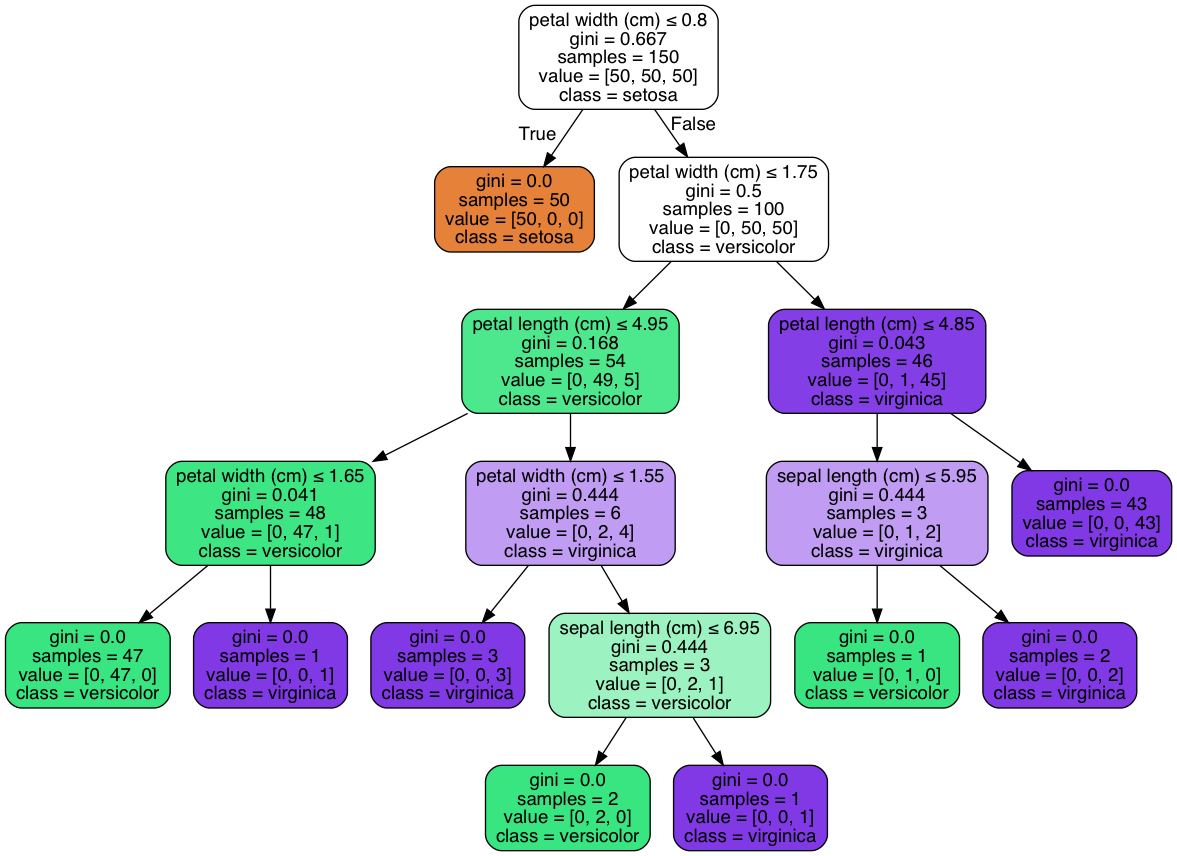

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

print(clf.predict(iris.data[:1, :]))
print(clf.predict_proba(iris.data[:1, :]))

from IPython.display import Image  
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO()
 

tree.export_graphviz(clf, out_file=dot_data, 
                    feature_names=iris.feature_names,  
                    class_names=iris.target_names,  
                    filled=True, rounded=True,  
                    special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


## 2. sklearn_pandas 练习

In [13]:
import random
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn_pandas import DataFrameMapper
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

# transformers for category variables
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# transformers for numerical variables
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# transformers for combined variables
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

# user-defined transformers
from sklearn.preprocessing import FunctionTransformer

# classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# evaluation
from sklearn.metrics import scorer


testdata = pd.DataFrame({'pet': ['cat', 'dog', 'dog', 'fish','cat', 'dog', 'cat', 'fish'],
                         'age': [4., 6, 3, 3, 2, 3, 5, 4],
                         'gender': ['male', 'female', 'female', 'male','male', 'female', 'male', 'female'],
                         'salary': [90,24,44,27,32,59,36,27]})

mapper = DataFrameMapper([ ('pet', LabelEncoder()),
                           ('age', MinMaxScaler()),
                           ('gender', LabelBinarizer()),
                           ('salary',None),
                         ])
testdata = mapper.fit_transform(testdata)

print testdata

[[  0.     0.5    1.    90.  ]
 [  1.     1.     0.    24.  ]
 [  1.     0.25   0.    44.  ]
 [  2.     0.25   1.    27.  ]
 [  0.     0.     1.    32.  ]
 [  1.     0.25   0.    59.  ]
 [  0.     0.75   1.    36.  ]
 [  2.     0.5    0.    27.  ]]


/Users/erwin/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/erwin/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


## 3. Python 自定义Package 路径

      meanfreq        sd    median       Q25       Q75       IQR      skew  \
3162  0.146023  0.092525  0.183434  0.041747  0.224337  0.182590  1.384981   
1785  0.180496  0.035275  0.176396  0.166348  0.191802  0.025455  3.483891   
479   0.161490  0.072859  0.152509  0.106876  0.234167  0.127291  1.660727   
2732  0.186664  0.033863  0.191071  0.166171  0.202759  0.036588  2.271343   
1197  0.201433  0.060773  0.237143  0.133469  0.251837  0.118367  2.359162   

           kurt    sp.ent       sfm   ...    centroid   meanfun    minfun  \
3162   5.118927  0.948999  0.659825   ...    0.146023  0.195640  0.039506   
1785  18.560294  0.847420  0.246110   ...    0.180496  0.168509  0.016427   
479    6.880295  0.964797  0.738279   ...    0.161490  0.124194  0.030075   
2732   7.793855  0.845458  0.242713   ...    0.186664  0.172861  0.052632   
1197   9.162217  0.857623  0.234357   ...    0.201433  0.128111  0.047525   

        maxfun   meandom    mindom    maxdom   dfrange   modindx   l

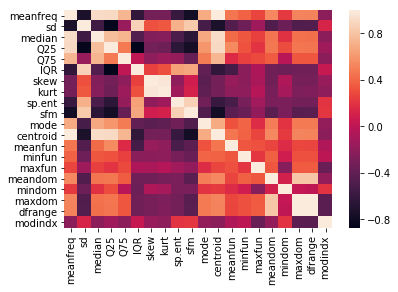

In [4]:
import sys
sys.path.append('/Users/cisco/.pyenv/versions/3.6.5/lib/python3.6/site-packages')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./data/voice.csv')
print(data.sample(5))

sns.heatmap(data.corr())